# 실무예제 4-4

## 다음은 한국신용평가정보에서 나온 국내 증권회사의 주요 제무제표(2007년 3월 31일 기준)의 일부이다. 주성분 분석을 통하여 데이터 차원을 축소시키시오.
### 데이터 파일 : ch4-4(국내증권사제무재표).csv
### 원본 투플수 : 18개

In [1]:
# ch4-4.py
import pandas as pd
import numpy as np

# 데이터로드 (ch4-4(국내증권사재무제표).csv : 데이터 원본 파일)
# encoding : 윈도우즈 환경에서의 한글 처리
# engine : python 3.6에서 한글이 포함된 파일이름 사용
rawData = pd.read_csv('.jupyter/ch4-4(국내증권사재무제표).csv', encoding='CP949', engine='python')

In [2]:
rawData

,증권사명,총자본순이익률,자기자본순이익률,자기자본비율,부채비율,자기자본회전율
0,SK증권,2.43,11.10,18.46,441.67,0.90
1,교보증권,3.09,9.95,29.46,239.43,0.90
2,대신증권,2.22,6.86,28.62,249.36,0.69
3,대우증권,5.76,23.19,23.47,326.09,1.43
4,동부증권,1.60,5.64,25.64,289.98,1.42
5,메리츠증권,3.53,10.64,32.25,210.10,1.17
6,미래에셋증권,4.26,15.56,24.40,309.78,0.81
7,부국증권,3.86,5.50,70.74,41.36,0.81
8,브릿지증권,4.09,6.44,64.38,55.32,0.32
9,삼성증권,2.73,10.68,24.41,309.59,0.64


In [3]:
# PCA 대상 속성 추출
pca_src = rawData[['총자본순이익률','자기자본순이익률','자기자본비율','부채비율','자기자본회전율']]

# 데이터 표준화를 위한 sklearn.preprocessing 중 StandardScaler 모듈 임포트
from sklearn.preprocessing import StandardScaler

# StandardScaler() : 데이터를 표준화시키기 위한 함수
pca_std = StandardScaler().fit_transform(pca_src)

# PCA 분석을 위한 sklearn.decomposition 중 PCA 모듈 임포트
from sklearn.decomposition import PCA

### PCA 변환을 시도하기 전에 원 속성값에 대한 Z-score 표준화(정규화)를 수행
#### 표준화하는 이유는 앞서 설명하였듯이, 큰 범위를 갖는 속성들에 의해 작은 범위를 갖는 속성들의 편차가 무시되지 않게 하기 위함임
### 주성분 분석을 위해 sklearn 패키지의 decomposition 모듈에 있는 PCA 서브모듈을 활용함

In [4]:
# i : 몇 차원으로 축소할 것인지에 대한 정보를 담기위한 변수
# cum_prop : n 차원까지의 누적기여율(cumulative proportion)을 담기위한 변수
i = 1
cum_prop = 0

# 몇 차원으로 축소할 것인지를 결정하는 루틴
# 여기서는 누적기여율이 0.95 이상이 되는 차원수까지 진행함
# pca.explained_variance_ratio_ : 분석된 주성분(principal components)의 기여율(percentage of variance)
while True :
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(pca_std)
    cum_prop += pca.explained_variance_ratio_[i-1]

    print("\n차원수 : " + str(i))
    print("기여율(Proportion of Variance) : " + str(pca.explained_variance_ratio_[i-1]))
    print("누적기여율(Cumulative Proportion) : " + str(cum_prop))

    # 누적기여율이 0.95 이상이면 루프 탈출
    if (cum_prop >= 0.95) :
        break
    i += 1


차원수 : 1
기여율(Proportion of Variance) : 0.5522924494935081
누적기여율(Cumulative Proportion) : 0.5522924494935081

차원수 : 2
기여율(Proportion of Variance) : 0.3211306358915945
누적기여율(Cumulative Proportion) : 0.8734230853851026

차원수 : 3
기여율(Proportion of Variance) : 0.1101126098747961
누적기여율(Cumulative Proportion) : 0.9835356952598987


### 예제는 5차원 속성들에 대해서 몇 차원까지 차원축소를 할 것인지에 대한 결정을 해야함
#### 이에 대한 기준으로 주성분의 누적기여율(cumulative proportion of explained variance)이 0.95(95%) 이상이 되는 것을 삼음. 예를 들어, 누적기여율이 0.95 이상이라는 의미는 차원을 축소하더라도 잃는 정보량(information loss)가 0.05(5%) 이하라는 의미임. 
### 주성분 분석은 pca 모듈의 fit_transform()에 의해 수행됨
### pca의 explained_variance_ratio_ 속성 : 분석된 주성분의 기여율(ratio of explained variance) 정보를 저장
### 주성분의 기여율
#### PC1이 55.23%, PC2가 32.11%, PC3이 11.01%
### 주성분의 누적기여율
#### PC2까지의 누적기여율은 87.34%, PC3까지의 누적기여율은 98.35%
### 0.95이상의 누적기여율을 보이는 주성분은 PC1, PC2, PC3 3개임 

In [5]:
pca_std

array([[-0.54815766,  0.39397411, -0.94485925,  1.37778058,  0.05213973],
       [ 0.04983251,  0.13499462, -0.32069039, -0.077102  ,  0.05213973],
       [-0.73842726, -0.56087201, -0.3683542 , -0.00566715, -0.54509716],
       [ 2.46897457,  3.11663676, -0.66057871,  0.54631634,  1.55945188],
       [-1.3001756 , -0.83561547, -0.53744721,  0.28654671,  1.53101203],
       [ 0.44849263,  0.29038232, -0.16237847, -0.28809738,  0.82001573],
       [ 1.109906  ,  1.39836414, -0.60780807,  0.42898478, -0.20381894],
       [ 0.74748771, -0.86714341,  2.0216451 , -1.50198626, -0.20381894],
       [ 0.95587823, -0.65545582,  1.66076201, -1.40156023, -1.59737169],
       [-0.27634394,  0.2993903 , -0.60724064,  0.42761795, -0.68729642],
       [-0.91057594, -1.09234296,  0.42093569, -0.82749165, -0.82949568],
       [-0.97399914, -0.09696092, -0.9437244 ,  1.37432754,  0.53561721],
       [ 0.19479983, -0.3131525 ,  0.30120876, -0.73907933,  0.87689544],
       [-0.92869686,  0.20931048, -1.0

In [6]:
# 주성분으로 구성되는 데이터프레임의 컬럼이름을 저장하는 리스트 변수
str_param = []

# 주성분 컬럼이름 리스트 구성
for j in range(1, i+1) :
    str_param.append("PC" + str(j))  # PC : 주성분(Principal Component)

# 주성분 데이터프레임 구성
principalDf = pd.DataFrame(data=principalComponents, columns=str_param)

# 주성분 데이터프레임 출력
print("\n* 주성분 데이터프레임 : ")
print(principalDf)

# components_ : 원 속성(총자본수익률, 자기자본수익률, 자기자본비율, 부채비율, 자기자본회전율)에
# 대한 주성분의 영향력(variance) 정도로서, 절대값이 클수록 영향력이 높음
print("\n* 원 속성에 대한 주성분 영향도(행: 주성분, 열: 원속성) : ")
print(pca.components_)

# '총자본순이익률','자기자본순이익률','자기자본비율','부채비율','자기자본회전율'


* 주성분 데이터프레임 : 
         PC1       PC2       PC3
0  -1.530135 -0.624247 -0.651987
1  -0.212363  0.082795 -0.051090
2   0.202561 -0.998596 -0.406532
3  -2.422543  3.607282  0.167239
4  -0.921329 -1.497481  1.402165
5  -0.378883  0.614958  0.677670
6  -0.962550  1.455459 -0.849686
7   2.482928  0.698177  0.948808
8   2.777440  0.781683 -0.463983
9  -0.416752 -0.288128 -0.955269
10  1.436287 -1.168267 -0.101039
11 -1.582712 -1.191224 -0.076838
12  0.331097  0.244697  1.133745
13 -2.089553 -0.992578  0.215123
14  3.127050 -0.909798 -0.797250
15  2.064575  1.320334  0.662556
16 -0.433389  0.307370 -1.241424
17 -1.471729 -1.442436  0.387792

* 원 속성에 대한 주성분 영향도(행: 주성분, 열: 원속성) : 
[[ 0.07608427 -0.39463007  0.56970191 -0.5598277  -0.44778451]
 [ 0.77966993  0.56541218  0.16228156 -0.19654293  0.08636803]
 [ 0.0008916  -0.29532165  0.24122211 -0.25659729  0.88811827]]


### pca의 components_ 속성 : 대상 데이터셋의 원 속성에 대한 주성분의 영향도
#### 절대값이 높을수록 영향도가 크다고 해석할 수 있음
### 원 속성에 대한 주성분의 영향도
#### PC1 : 자기자본비율과 부채비율에 관련됨
#### PC2 : 총자본순이익률과 자기자본순이익률에 관련됨
#### PC3 : 자기자본회전율과 관련이 있음을 보여줌
### 재무지표 항목에 의미에 근거하여 주성분 속성을 명명한다면
#### PC1 : 안정성
#### PC2 : 수익성
#### PC3 : 활동성

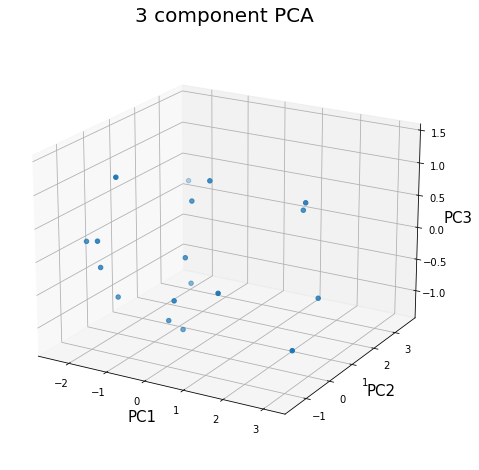

In [7]:
# 주성분의 (차원)수가 3차원이라는 가정 하에 시각화
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3차원 그래프 생성을 위한 모듈 임포트

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_zlabel('PC3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

ax.scatter(principalDf.loc[:, 'PC1'], principalDf.loc[:, 'PC2'], principalDf.loc[:, 'PC3'])
ax.view_init(20, -60)
plt.show()  # 3차원 그래프 보여주기

### 주성분이 3개(3차원) 이라는 가정하에 3차원 시각화